In [2]:
# Objective:
#     To identify performance of products based on customer experience. 
# - Here products are scrapped for KIND Inc Snacks
#     We track the experience by calculating sentimental polarities for 
#     reviews posted on amazon.com for each product.
#     Further, we track count of sales based on locations.
#     All data is gathered by mining data from amazon.com.
#     For following, limited data is used: 
#         Scrape of one page reviews, user profiles, product sub kinds etc.
#         The script can be run in loop to gather data for all pages.

#Product: KIND Almond and Coconut Natural 14 Ounce / Any product of your choice can be scrapped and checked

In [9]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://www.amazon.com/KIND-Almond-Coconut-Natural-1-4-Ounce/product-reviews/B0034EDMCW/ref=sr_1_1_a_it/142-2812378-9138139?ie=UTF8&qid=1496343725&sr=8-1&keywords=kind+snack+bars")
soup = BeautifulSoup(page.content, 'html.parser')

In [10]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link href="//m.media-amazon.com" rel="dns-prefetch"/><link href="//completion.amazon.com" rel="dns-prefetch"/><!-- sp:feature:aui-assets -->
<link href="https://images-na.ssl-images-amazon.com/images/I/51Bu84TuthL._RC|010Q14DPSqL.css,01pVbSC-RPL.css,011ngSRsemL.css,31tVDmXuebL.css,01EOAZ+RhQL.css,11eQ+qEknqL.css,11UbYilk4mL.css,11g4ZqMHAkL.css,21Pd9HarLOL.css,015uc33ipFL.css,21HId9JfYYL.css,01LJGuGyVyL.css,11U6TmZEZFL.css,11Fd9tJOdtL.css,21RNFprmuBL.css,11WgRxUdJRL.css,01TvogYZ+AL.css,01G4hnpC1nL.css,01SHjPML6tL.css,11e2M+GTQOL.css,01LNZ6vG2wL.css,31taE7v0pDL.css,11xvlYbx2EL.css_.css?AUIClients/AmazonUI#us.not-triden

In [11]:
list_types = [type(item) for item in list(soup.children)]

In [12]:
#extracting Reviews, Review Dates and Total number of reviews for selected a product.
soup_s = soup.find_all('span')
soup_reviews = soup.find_all('span', class_='a-size-base review-text')
review_date = soup.find_all('span', class_='a-size-base a-color-secondary review-date')
dates_only = soup.select("#cm_cr-review_list .review-date")
total_reviews = list(soup.select('.AverageCustomerReviews .a-row'))[0].get_text()

In [13]:
total_reviews

'2,901'

In [9]:
#Extracting Reviewer ID/names for location tracking based on ID.
#Future scope: To be used to analyze
#sales based on locations
reviewers = list(soup.select('.author'))
for each in reviewers:
    print(each.get_text())

Dave Delgado
Carlos
Jean Elf
Michael C
John Gretsch
YeahSoMaybe?
MediocreSamaritan
Amazon Customer
Book Babe
Hurricane


In [10]:
#Checking first entry of date
list(dates_only)[0].get_text()

'on August 27, 2011'

In [11]:
#Every product has different flavors and kinds.
#Amazon combines reviews of all flavors together in
# one - under the product title.
#We extract each flavour kind for selected product, to further
# drill down analysis based on flavors.
flav_size = list(soup.select('.a-size-mini.a-color-secondary'))
for each in flav_size:
    print(each.get_text())

Flavor: Fruit & Nut Delight|Size: Pack of 12
Flavor: Fruit & Nut Delight|Size: Pack of 12
Flavor: Almond & Apricot|Size: 12 Count
Flavor: Almond & Apricot|Size: 12 Count
Flavor: Nut Delight|Size: Pack of 12
Flavor: Almond & Apricot|Size: 12 Count
Flavor: Almond & Coconut|Size: 12 Count
Flavor: Nut Delight|Size: Pack of 12
Flavor: Fruit & Nuts in Yogurt|Size: 12 Count
Flavor: Blueberry Vanilla and Cashew|Size: 12 Count


In [12]:
#Checking all reviews in plain text.
for each in list(soup_reviews):
    print(each.get_text())

These are a staple on my grocery list from Amazon (I get two boxes a month on the "Subscribe and Save" program, and often have to "send next shipment now" because I share them with friends at work).  However, I've become alarmed when I open the newer boxes / packages- the bars are at least an inch shorter than they used to be.I thought maybe I had a few from the "end of the roll" or something, but it seems rather consistent now.  The cellophane wrapper is the same size, but the bars are missing at least a full bite of what the bars used to be.  And the prices keep going up.  I like these, but at some point the decreased "value" will get to a point where I'll find something else to snack on.
The bars were not fresh at all as if they were stored in a hot warehouse for too long. Also the box and wrapping seemed to be old since I eat these every day and I know exactly how they look and what they say on them. This must have been an old batch. From now on I'm ordering from Kind themselves an

In [13]:
#We use textblob and Natural Language toolkit for
# sentiment analysis of reviews
from textblob import TextBlob
import nltk

In [14]:
#Check operation: Storing first review in plain text format
blob = TextBlob(list(soup_reviews)[0].get_text())
blob

TextBlob("These are a staple on my grocery list from Amazon (I get two boxes a month on the "Subscribe and Save" program, and often have to "send next shipment now" because I share them with friends at work).  However, I've become alarmed when I open the newer boxes / packages- the bars are at least an inch shorter than they used to be.I thought maybe I had a few from the "end of the roll" or something, but it seems rather consistent now.  The cellophane wrapper is the same size, but the bars are missing at least a full bite of what the bars used to be.  And the prices keep going up.  I like these, but at some point the decreased "value" will get to a point where I'll find something else to snack on.")

In [15]:
blob.tags

[('These', 'DT'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('staple', 'NN'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('grocery', 'JJ'),
 ('list', 'NN'),
 ('from', 'IN'),
 ('Amazon', 'NNP'),
 ('I', 'PRP'),
 ('get', 'VBP'),
 ('two', 'CD'),
 ('boxes', 'NNS'),
 ('a', 'DT'),
 ('month', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('Subscribe', 'NNP'),
 ('and', 'CC'),
 ('Save', 'NNP'),
 ('program', 'NN'),
 ('and', 'CC'),
 ('often', 'RB'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('send', 'VB'),
 ('next', 'JJ'),
 ('shipment', 'NN'),
 ('now', 'RB'),
 ('because', 'IN'),
 ('I', 'PRP'),
 ('share', 'NN'),
 ('them', 'PRP'),
 ('with', 'IN'),
 ('friends', 'NNS'),
 ('at', 'IN'),
 ('work', 'NN'),
 ('However', 'RB'),
 ('I', 'PRP'),
 ("'ve", 'VBP'),
 ('become', 'VBN'),
 ('alarmed', 'JJ'),
 ('when', 'WRB'),
 ('I', 'PRP'),
 ('open', 'VBP'),
 ('the', 'DT'),
 ('newer', 'JJR'),
 ('boxes', 'NNS'),
 ('/', 'RBR'),
 ('packages-', 'JJ'),
 ('the', 'DT'),
 ('bars', 'NNS'),
 ('are', 'VBP'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('an', 'DT'),
 ('inc

In [16]:
#Identifying Polarity and Subjectivity for each line of first review
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.0625, subjectivity=0.3125)
Sentiment(polarity=-0.037500000000000006, subjectivity=0.28125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=0.7)


In [17]:
#Identifying nouns
blob.noun_phrases

WordList(['grocery list', 'amazon', 'subscribe', 'save', 'boxes / packages-', 'inch shorter', 'cellophane wrapper'])

In [18]:
#Check operation: Polarity for entire review (here first review)
blob.sentiment.polarity

-0.08

In [19]:
#Identifying Polarities for all extracted reviews.
for each in list(soup_reviews):
    print(round((TextBlob(each.get_text()).sentiment.polarity),5))

-0.08
0.18253
-0.04751
0.00722
0.23605
0.27239
0.12079
-0.30833
0.0875
0.325


In [20]:
#Storing dates as plain text format
dates_list1 = []
for each in list(dates_only):
    dates_list1.append(each.get_text())

In [21]:
#Converting text dates to date types
from dateutil import parser
dates_list = []
for date in dates_list1:
    dates_list.append(parser.parse(date).strftime('%Y-%m-%d'))

In [22]:
#Checking dates: to be in Date type
dates_list

['2011-08-27',
 '2017-02-16',
 '2017-03-02',
 '2013-03-29',
 '2016-09-10',
 '2016-12-27',
 '2017-03-08',
 '2016-09-12',
 '2017-03-03',
 '2017-02-24']

In [23]:
#Extracting Year from dates
from dateutil import parser
dates_year = []
for date in dates_list1:
    dates_year.append(parser.parse(date).strftime('%Y'))

In [24]:
dates_year

['2011',
 '2017',
 '2017',
 '2013',
 '2016',
 '2016',
 '2017',
 '2016',
 '2017',
 '2017']

In [25]:
#Storing years in INT. This can be used when we scrape data
# for all pages (when dataset is huge)
years_int = []
for each in dates_year:
    years_int.append(int(each))

In [26]:
years_int

[2011, 2017, 2017, 2013, 2016, 2016, 2017, 2016, 2017, 2017]

In [27]:
#Creating list for Reviewers
reviewers_list = []
for each in list(reviewers):
    reviewers_list.append(each.get_text())

In [28]:
#List for Flavour types
flav_list = []
for each in list(flav_size):
    flav_list.append(each.get_text())

In [29]:
#List for Polarities of all reviews
polarity_list = []
for each in list(soup_reviews):
    polarity_list.append(round((TextBlob(each.get_text()).sentiment.polarity),5))

In [30]:
#Check operation: If lengths of all variables are same
len(dates_list) == len(flav_list) == len(polarity_list)

True

In [31]:
#Now we create a raw data(and raw_data2) and store in data Frames
import pandas

In [32]:
raw_data = {'Reviewer': reviewers_list, 'Flavor': flav_list, 'Dates': dates_list, 'Polarity' : polarity_list  }
raw_data1 = {'Reviewer': reviewers_list, 'Flavor': flav_list, 'Dates': dates_list1, 'Polarity' : polarity_list  }
df = pandas.DataFrame(raw_data1, columns = ['Flavor','Reviewer','Dates', 'Polarity'])
df

,Flavor,Reviewer,Dates,Polarity
0,Flavor: Fruit & Nut Delight|Size: Pack of 12,Dave Delgado,"on August 27, 2011",-0.08000
1,Flavor: Fruit & Nut Delight|Size: Pack of 12,Carlos,"on February 16, 2017",0.18253
2,Flavor: Almond & Apricot|Size: 12 Count,Jean Elf,"on March 2, 2017",-0.04751
3,Flavor: Almond & Apricot|Size: 12 Count,Michael C,"on March 29, 2013",0.00722
4,Flavor: Nut Delight|Size: Pack of 12,John Gretsch,"on September 10, 2016",0.23605
5,Flavor: Almond & Apricot|Size: 12 Count,YeahSoMaybe?,"on December 27, 2016",0.27239
6,Flavor: Almond & Coconut|Size: 12 Count,MediocreSamaritan,"on March 8, 2017",0.12079
7,Flavor: Nut Delight|Size: Pack of 12,Amazon Customer,"on September 12, 2016",-0.30833
8,Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,Book Babe,"on March 3, 2017",0.08750
9,Flavor: Blueberry Vanilla and Cashew|Size: 12 ...,Hurricane,"on February 24, 2017",0.32500


In [33]:
df1 = pandas.DataFrame(raw_data, columns = ['Flavor','Reviewer','Dates', 'Polarity'])
#Sorting df1 as per Dates
df1 = df1.sort_values('Dates')
df1

,Flavor,Reviewer,Dates,Polarity
0,Flavor: Fruit & Nut Delight|Size: Pack of 12,Dave Delgado,2011-08-27,-0.08000
3,Flavor: Almond & Apricot|Size: 12 Count,Michael C,2013-03-29,0.00722
4,Flavor: Nut Delight|Size: Pack of 12,John Gretsch,2016-09-10,0.23605
7,Flavor: Nut Delight|Size: Pack of 12,Amazon Customer,2016-09-12,-0.30833
5,Flavor: Almond & Apricot|Size: 12 Count,YeahSoMaybe?,2016-12-27,0.27239
1,Flavor: Fruit & Nut Delight|Size: Pack of 12,Carlos,2017-02-16,0.18253
9,Flavor: Blueberry Vanilla and Cashew|Size: 12 ...,Hurricane,2017-02-24,0.32500
2,Flavor: Almond & Apricot|Size: 12 Count,Jean Elf,2017-03-02,-0.04751
8,Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,Book Babe,2017-03-03,0.08750
6,Flavor: Almond & Coconut|Size: 12 Count,MediocreSamaritan,2017-03-08,0.12079


In [34]:
#We begin with visualization
#We use ggplot, pandas, matplotlib
from ggplot import *

/Users/temp/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/temp/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/temp/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


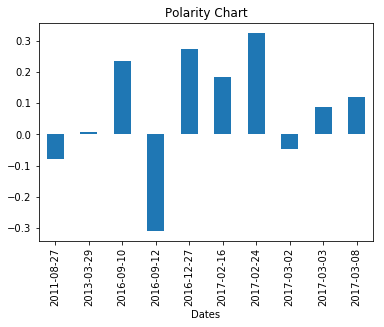

In [35]:
#Following will show a chart identifying polarities vs dates

import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.pyplot.style.use = 'default'
df1_plot = df1.plot(kind="bar",x=df1["Dates"],
                          title="Polarity Chart",
                          legend=False)

In [36]:
#Based on the above chart, it is unclear to track down progress
# in Customer experience
#based on the reviews
# since a) Multile polarities are distinctly plotted for
# flavors that are repeated
# b) No roll-up performed on Flavor kind
#We eliminate this and improvise our chart as follows:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

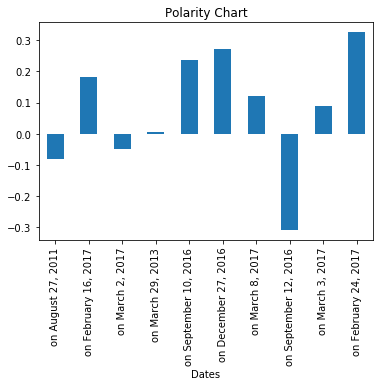

In [39]:
# 
%matplotlib inline
plt.style.use ='seaborn'
df_plot = df.plot(kind="bar",x=df["Dates"],
                          title="Polarity Chart",
                          legend=False)

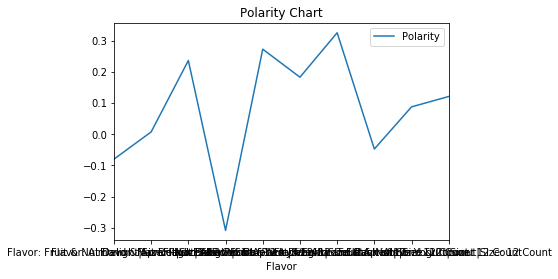

In [40]:
%matplotlib inline
matplotlib.pyplot.style.use = 'default'
df1_plot = df1.plot(kind="line",x=df1["Flavor"],
                          title="Polarity Chart",
                          legend=True)

In [65]:
#cleaning the data on Date type and plotting clean chart of polarity vs dates
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

In [66]:
datafile = df1

AttributeError: 'str' object has no attribute 'year'

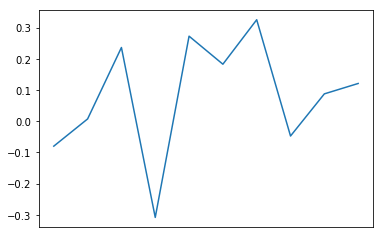

In [83]:


fig, ax = plt.subplots()
ax.plot(range(len(df1['Dates'])), df1['Polarity'])


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(df1['Dates'].min().year, 1, 1)
datemax = datetime.date(df1['Dates'].max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = df1['Polarity']
ax.grid(True)
fig.autofmt_xdate()

plt.show()

In [44]:
df2 = df[['Flavor', 'Polarity']]

In [45]:
#Check: Flavor has repeated values, thus we rollup 
# based on flavor type
df2

,Flavor,Polarity
0,Flavor: Fruit & Nut Delight|Size: Pack of 12,-0.08000
1,Flavor: Fruit & Nut Delight|Size: Pack of 12,0.18253
2,Flavor: Almond & Apricot|Size: 12 Count,-0.04751
3,Flavor: Almond & Apricot|Size: 12 Count,0.00722
4,Flavor: Nut Delight|Size: Pack of 12,0.23605
5,Flavor: Almond & Apricot|Size: 12 Count,0.27239
6,Flavor: Almond & Coconut|Size: 12 Count,0.12079
7,Flavor: Nut Delight|Size: Pack of 12,-0.30833
8,Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,0.08750
9,Flavor: Blueberry Vanilla and Cashew|Size: 12 ...,0.32500


In [46]:
df3 = df2.groupby(['Flavor']).size().reset_index()

In [47]:
#Check: Flavor has repeated values, we GroupBy based on flavor type
df2.groupby(['Flavor']).size().reset_index()

,Flavor,0
0,Flavor: Almond & Apricot|Size: 12 Count,3
1,Flavor: Almond & Coconut|Size: 12 Count,1
2,Flavor: Blueberry Vanilla and Cashew|Size: 12 ...,1
3,Flavor: Fruit & Nut Delight|Size: Pack of 12,2
4,Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,1
5,Flavor: Nut Delight|Size: Pack of 12,2


In [48]:
#We check various measures for polarity

df2['Polarity'].groupby(df2['Flavor']).describe()

,count,mean,std,min,25%,50%,75%,max
Flavor,,,,,,,,
Flavor: Almond & Apricot|Size: 12 Count,3.0,0.077367,0.171098,-0.04751,-0.020145,0.007220,0.139805,0.27239
Flavor: Almond & Coconut|Size: 12 Count,1.0,0.120790,NaN,0.12079,0.120790,0.120790,0.120790,0.12079
Flavor: Blueberry Vanilla and Cashew|Size: 12 Count,1.0,0.325000,NaN,0.32500,0.325000,0.325000,0.325000,0.32500
Flavor: Fruit & Nut Delight|Size: Pack of 12,2.0,0.051265,0.185637,-0.08000,-0.014367,0.051265,0.116898,0.18253
Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,1.0,0.087500,NaN,0.08750,0.087500,0.087500,0.087500,0.08750
Flavor: Nut Delight|Size: Pack of 12,2.0,-0.036140,0.384935,-0.30833,-0.172235,-0.036140,0.099955,0.23605


In [49]:
df3 = df2.groupby(['Flavor']).size().reset_index()

In [50]:
df3.columns = ['Flavor', 'Count']

#DataFrame with Flavor and corresponding Count of repeatation
df3

,Flavor,Count
0,Flavor: Almond & Apricot|Size: 12 Count,3
1,Flavor: Almond & Coconut|Size: 12 Count,1
2,Flavor: Blueberry Vanilla and Cashew|Size: 12 ...,1
3,Flavor: Fruit & Nut Delight|Size: Pack of 12,2
4,Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,1
5,Flavor: Nut Delight|Size: Pack of 12,2


In [51]:
df4 = df2.groupby(['Flavor']).mean().reset_index()
df4.columns = ['Flavor', 'Avg_polarity']

#DataFrame with Flavours and Avg_polarities for each
df4

,Flavor,Avg_polarity
0,Flavor: Almond & Apricot|Size: 12 Count,0.077367
1,Flavor: Almond & Coconut|Size: 12 Count,0.120790
2,Flavor: Blueberry Vanilla and Cashew|Size: 12 ...,0.325000
3,Flavor: Fruit & Nut Delight|Size: Pack of 12,0.051265
4,Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,0.087500
5,Flavor: Nut Delight|Size: Pack of 12,-0.036140


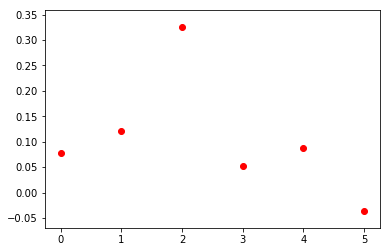

In [52]:
plt.scatter(range(len(df4['Flavor'])),df4['Avg_polarity'],  color = 'red')

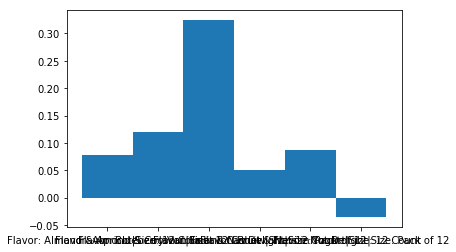

In [53]:
fig, (ax1) = plt.subplots(1)
# ax1.bar(range(len(large_letter)), large_num, tick_label=large_letter)
# ax2.bar(range(len(small_letter)), small_num, tick_label=small_letter)

# EXTRA METHOD AS FOLLOWS:
width = 1.0

# Find the lefts of the bars. You can change this to leave a gap between bars
lefts = [x * width for x, _ in enumerate(df4['Flavor'])]

# Create bar graph
ax1.bar(lefts, df4['Avg_polarity'], width=width, tick_label=df4['Flavor'])
plt.show()

In [54]:
#Check operation: Polarities after performing Roll up on Flavours

s1 = df4['Avg_polarity']
list(s1)

[0.077366666666666681,
 0.12078999999999999,
 0.32500000000000001,
 0.051264999999999998,
 0.087499999999999994,
 -0.036139999999999992]

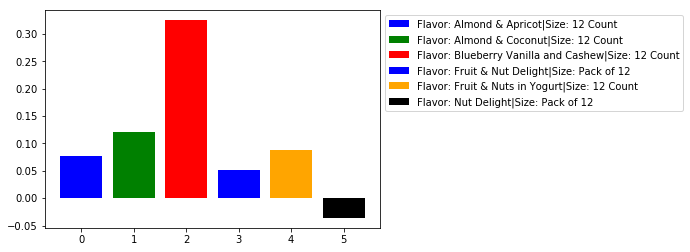

In [55]:
#Chart to identify combined Polarities for each Flavor kind

x = range(len((df4['Flavor'])))
y = list(s1)
colors = ['b', 'g', 'r', 'b', 'r','g']
z = np.arange(len(df4['Flavor']))
c = ["blue", "green", "red","blue", "orange", "black"]

for i in z:
    plt.bar(x[i], y[i], color = c[i], label= str(df4['Flavor'][i]))
plt.legend(bbox_to_anchor=(1.0,1), loc="upper left")

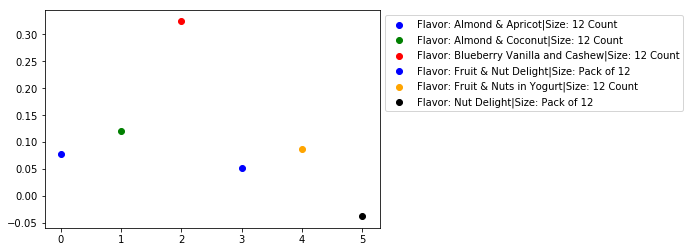

In [56]:
#Scatter plot representation of above chart

for i in z:
    plt.scatter(x[i], y[i], color = c[i], label= str(df4['Flavor'][i]))
plt.legend(bbox_to_anchor=(1.0,1), loc="upper left")

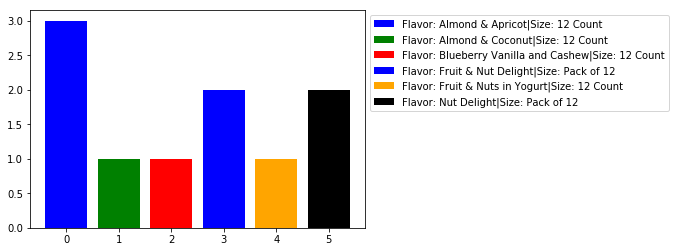

In [57]:
#Plot for Flavors vs Sales (count of distinct reviews for each flavor)
#Values out of total sales = 10 (limited data)

x2 = range(len((df3['Flavor'])))
y2 = list(df3['Count'])
colors = ['b', 'g', 'r', 'b', 'r','g']
z = np.arange(len(df3['Flavor']))
c = ["blue", "green", "red","blue", "orange", "black"]

for i in z:
    plt.bar(x2[i], y2[i], color = c[i], label= str(df3['Flavor'][i]))
plt.legend(bbox_to_anchor=(1.0,1), loc="upper left")

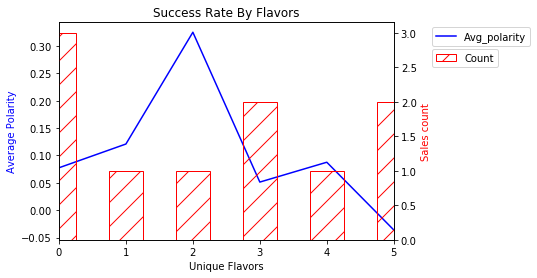

In [58]:
#The following plot shows the performance of distinct Flavours
#across the point of sales (based on count of reviews for each flavor type)
#and their corresponding polarities (based on colaborative reviews)

fig, ax = plt.subplots()
plt.title('Success Rate By Flavors')
ax2 = ax.twinx()

dfnew = df3.reset_index().set_index('Flavor')
# dfnew.Count.plot.bar(color='None', ax=ax2)
# dfnew.Count.plot.bar(color='None', edgecolor='red', hatch='/', ax=ax2)
df3.Count.plot.bar(color='None', edgecolor='red', hatch='/', ax=ax2)
# plt.xticks(rotation=45)
df4.Avg_polarity.plot(color='blue', ax=ax)

ax2.set_ylabel("Sales count", color='red')
ax.set_ylabel(ylabel='Average Polarity', color='blue')

# ax.set_xticks(range(1,7))
# ax.set_xticklabels(df3['Flavor'], rotation = -45)
ax.set_xlabel('Unique Flavors')
ax.legend(bbox_to_anchor=(1.1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(1.1,0.9), loc="upper left")

In [59]:
dfnew

,index,Count
Flavor,,
Flavor: Almond & Apricot|Size: 12 Count,0,3
Flavor: Almond & Coconut|Size: 12 Count,1,1
Flavor: Blueberry Vanilla and Cashew|Size: 12 Count,2,1
Flavor: Fruit & Nut Delight|Size: Pack of 12,3,2
Flavor: Fruit & Nuts in Yogurt|Size: 12 Count,4,1
Flavor: Nut Delight|Size: Pack of 12,5,2


In [61]:
# development in progress..
# --end--